In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("historicos/modificados/bitcoin_modificado.csv")
# df = pd.read_csv("historicos/modificados/Cardano_modificado.csv")
df

,Symbol,Date,High,Low,Open,Close
0,BTC,2013-04-29,147.49,134.00,134.44,144.54
1,BTC,2013-04-30,146.93,134.05,144.00,139.00
2,BTC,2013-05-01,139.89,107.72,139.00,116.99
3,BTC,2013-05-02,125.60,92.28,116.38,105.21
4,BTC,2013-05-03,108.13,79.10,106.25,97.75
...,...,...,...,...,...,...
3169,BTC,2022-01-01,47967.12,46205.00,46211.24,47733.43
3170,BTC,2022-01-02,47990.00,46633.36,47733.43,47299.07
3171,BTC,2022-01-03,47583.33,45700.00,47299.06,46459.56
3172,BTC,2022-01-04,47532.89,45515.00,46459.57,45814.61


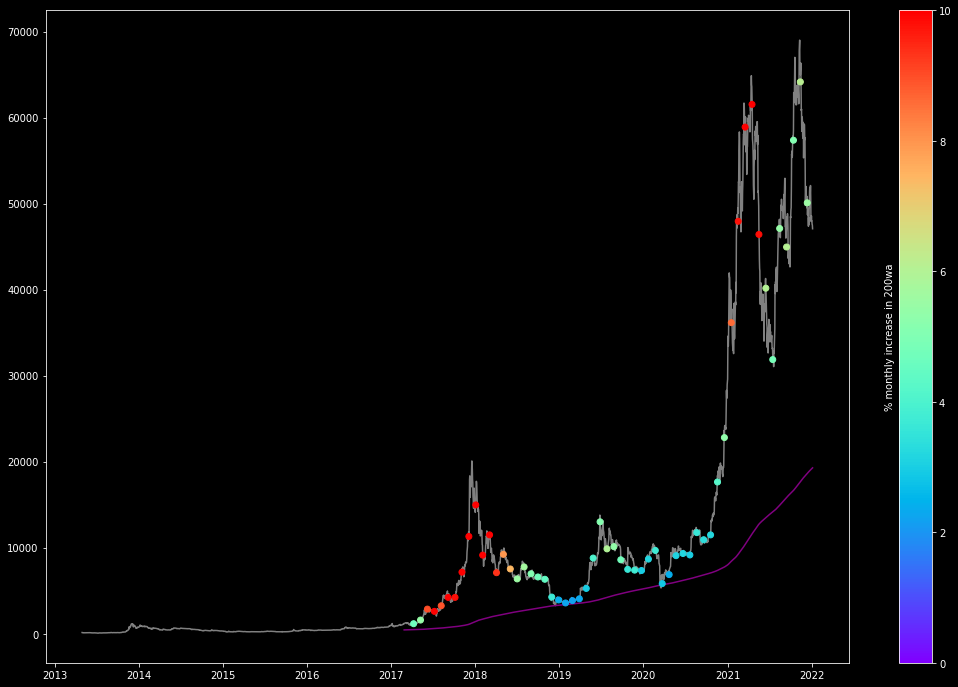

In [117]:
df['200w_moving_average'] = df['High'].rolling(window = 1400).mean()

dates = pd.to_datetime(df['Date'])
plt.rcParams['figure.figsize'] = [18, 12]
plt.style.use("dark_background")
monthly = df[::30]
distance = monthly['200w_moving_average'].pct_change() * 100
# plt.semilogy(dates, df['High'], color="gray", zorder=1);
# plt.semilogy(dates, df['200w_moving_average'], color="purple", zorder=2);

plt.plot(dates, df['High'], color="gray", zorder=1);
plt.plot(dates, df['200w_moving_average'], color="purple", zorder=2);
plt.scatter(monthly['Date'], monthly['Open'], c=distance, cmap='rainbow', vmin=0, vmax=10, zorder=3)

cbar = plt.colorbar()
cbar.set_label("% monthly increase in 200wa")
cbar.ax.yaxis.set_label_position("left")

In [118]:
df

,Symbol,Date,High,Low,Open,Close,200w_moving_average
0,BTC,2013-04-29,147.49,134.00,134.44,144.54,NaN
1,BTC,2013-04-30,146.93,134.05,144.00,139.00,NaN
2,BTC,2013-05-01,139.89,107.72,139.00,116.99,NaN
3,BTC,2013-05-02,125.60,92.28,116.38,105.21,NaN
4,BTC,2013-05-03,108.13,79.10,106.25,97.75,NaN
...,...,...,...,...,...,...,...
3169,BTC,2022-01-01,47967.12,46205.00,46211.24,47733.43,19183.707407
3170,BTC,2022-01-02,47990.00,46633.36,47733.43,47299.07,19209.762693
3171,BTC,2022-01-03,47583.33,45700.00,47299.06,46459.56,19235.390714
3172,BTC,2022-01-04,47532.89,45515.00,46459.57,45814.61,19261.128421


In [119]:
df['variacion_diaria'] = (df['High'] - df['Low']) / df['Low'] * 100
df

,Symbol,Date,High,Low,Open,Close,200w_moving_average,variacion_diaria
0,BTC,2013-04-29,147.49,134.00,134.44,144.54,NaN,10.067164
1,BTC,2013-04-30,146.93,134.05,144.00,139.00,NaN,9.608355
2,BTC,2013-05-01,139.89,107.72,139.00,116.99,NaN,29.864463
3,BTC,2013-05-02,125.60,92.28,116.38,105.21,NaN,36.107499
4,BTC,2013-05-03,108.13,79.10,106.25,97.75,NaN,36.700379
...,...,...,...,...,...,...,...,...
3169,BTC,2022-01-01,47967.12,46205.00,46211.24,47733.43,19183.707407,3.813700
3170,BTC,2022-01-02,47990.00,46633.36,47733.43,47299.07,19209.762693,2.909162
3171,BTC,2022-01-03,47583.33,45700.00,47299.06,46459.56,19235.390714,4.121072
3172,BTC,2022-01-04,47532.89,45515.00,46459.57,45814.61,19261.128421,4.433461


In [120]:
df.apply(lambda row: (row.Close - row.Open) / row.Open * 100, axis=1)

0        7.512645
1       -3.472222
2      -15.834532
3       -9.597869
4       -8.000000
          ...    
3169     3.293982
3170    -0.909970
3171    -1.774877
3172    -1.388218
3173    -2.071169
Length: 3174, dtype: float64

In [121]:
df['variacion_diaria'] = df.apply(lambda row: (row.Close - row.Open) / row.Open * 100, axis=1)
df

,Symbol,Date,High,Low,Open,Close,200w_moving_average,variacion_diaria
0,BTC,2013-04-29,147.49,134.00,134.44,144.54,NaN,7.512645
1,BTC,2013-04-30,146.93,134.05,144.00,139.00,NaN,-3.472222
2,BTC,2013-05-01,139.89,107.72,139.00,116.99,NaN,-15.834532
3,BTC,2013-05-02,125.60,92.28,116.38,105.21,NaN,-9.597869
4,BTC,2013-05-03,108.13,79.10,106.25,97.75,NaN,-8.000000
...,...,...,...,...,...,...,...,...
3169,BTC,2022-01-01,47967.12,46205.00,46211.24,47733.43,19183.707407,3.293982
3170,BTC,2022-01-02,47990.00,46633.36,47733.43,47299.07,19209.762693,-0.909970
3171,BTC,2022-01-03,47583.33,45700.00,47299.06,46459.56,19235.390714,-1.774877
3172,BTC,2022-01-04,47532.89,45515.00,46459.57,45814.61,19261.128421,-1.388218


<AxesSubplot:>

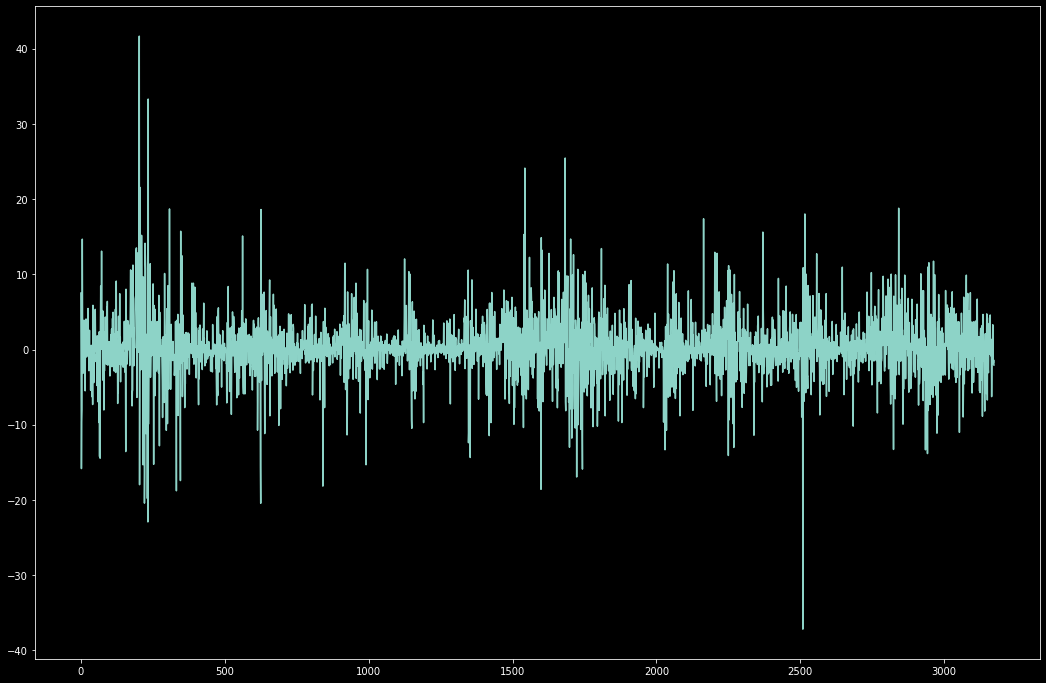

In [122]:
df['variacion_diaria'].plot()

In [123]:
for i in distance:
    print(i)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4.681463518909812
5.450899395747677
9.019252689138412
9.982037694274993
8.944908085519842
13.212946987277242
9.815094747299424
13.134071768350552
17.828465347619414
30.95193427129177
18.91536613086442
12.057329329327304
9.357453991402064
7.963158903142542
7.442651616009854
5.556658481786858
5.726740561837862
5.080698897792368
4.750673020594687
4.446286701103319
3.678151622147263
2.3895600744967105
2.2704878756839575
2.1992392951673656
2.3189572320079233
2.986524078880315
4.053162240891761
5.119794544067857
5.946037066160459
5.37032315747632
4.750281037177939
3.622933591244837
3.771498859051836
3.00687793441321
3.172980939743808
3.718036964639171
2.856774690140762
2.3912989432969933
3.0963700213357592
3.202504389399774
3.0089082053727623
3.623109423829729
3.381786756010663
3.2180901514311966
4.2038